In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

pd.options.display.float_format = '{:f}'.format

In [2]:
full_df = pd.read_csv('telecom_customer.csv')
full_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0.000000,Z,U,U,U,U,U,Y,240.000000,1000002
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0.000000,N,U,Y,U,U,U,Y,1504.000000,1000003
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,0.000000,U,Y,U,U,U,U,Y,1812.000000,1000004
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,Y,U,Y,773.000000,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,N,U,U,Y,Y,Y,Y,835.000000,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,U,Y,Y,U,U,U,N,433.000000,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,S,U,U,U,U,U,N,75.000000,1099999


In [3]:
df = full_df.dropna()
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,N,U,U,U,U,U,Y,361.000000,1000001
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,I,U,U,U,U,U,Y,434.000000,1000005
9,31.662500,25.500000,29.990000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,...,1.000000,N,U,U,U,U,U,Y,601.000000,1000010
14,212.515000,1971.500000,84.990000,2.227500,249.500000,99.800000,99.800000,0.000000,35.497500,-200.500000,...,0.000000,N,U,U,Y,U,U,Y,199.000000,1000015
16,63.017500,440.250000,59.980000,0.000000,5.750000,1.725000,1.725000,0.000000,1.312500,-16.250000,...,0.000000,N,U,U,U,U,U,Y,530.000000,1000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,49.362500,187.750000,40.072500,2.970000,18.000000,6.320000,6.125000,0.195000,0.000000,-187.750000,...,0.000000,S,U,U,U,U,U,Y,153.000000,1099940
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,N,U,U,U,U,Y,Y,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,H,U,U,Y,U,U,Y,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,H,U,U,U,U,U,Y,945.000000,1099971


In [4]:
cat_columns = []
for c in df.columns:
    if df[c].dtype.name == 'object':
        cat_columns.append(c)
        df[c] = df[c].astype('category')
print(cat_columns)
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df

['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


/var/folders/m4/7rszzss57xs8c_n79jnryrrw0000kt/T/ipykernel_88856/4259628228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype('category')
/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0.000000,8,0,0,0,0,0,1,361.000000,1000001
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,0.000000,5,0,0,0,0,0,1,434.000000,1000005
9,31.662500,25.500000,29.990000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,...,1.000000,8,0,0,0,0,0,1,601.000000,1000010
14,212.515000,1971.500000,84.990000,2.227500,249.500000,99.800000,99.800000,0.000000,35.497500,-200.500000,...,0.000000,8,0,0,1,0,0,1,199.000000,1000015
16,63.017500,440.250000,59.980000,0.000000,5.750000,1.725000,1.725000,0.000000,1.312500,-16.250000,...,0.000000,8,0,0,0,0,0,1,530.000000,1000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,49.362500,187.750000,40.072500,2.970000,18.000000,6.320000,6.125000,0.195000,0.000000,-187.750000,...,0.000000,12,0,0,0,0,0,1,153.000000,1099940
99940,47.490000,0.000000,49.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,8,0,0,0,0,1,1,829.000000,1099941
99963,41.840000,351.000000,30.000000,0.990000,31.000000,10.850000,10.850000,0.000000,0.000000,0.000000,...,0.000000,4,0,0,1,0,0,1,254.000000,1099964
99970,38.340000,319.500000,30.000000,0.990000,21.000000,7.350000,7.350000,0.000000,0.000000,-66.500000,...,0.000000,4,0,0,0,0,0,1,945.000000,1099971


<AxesSubplot:>

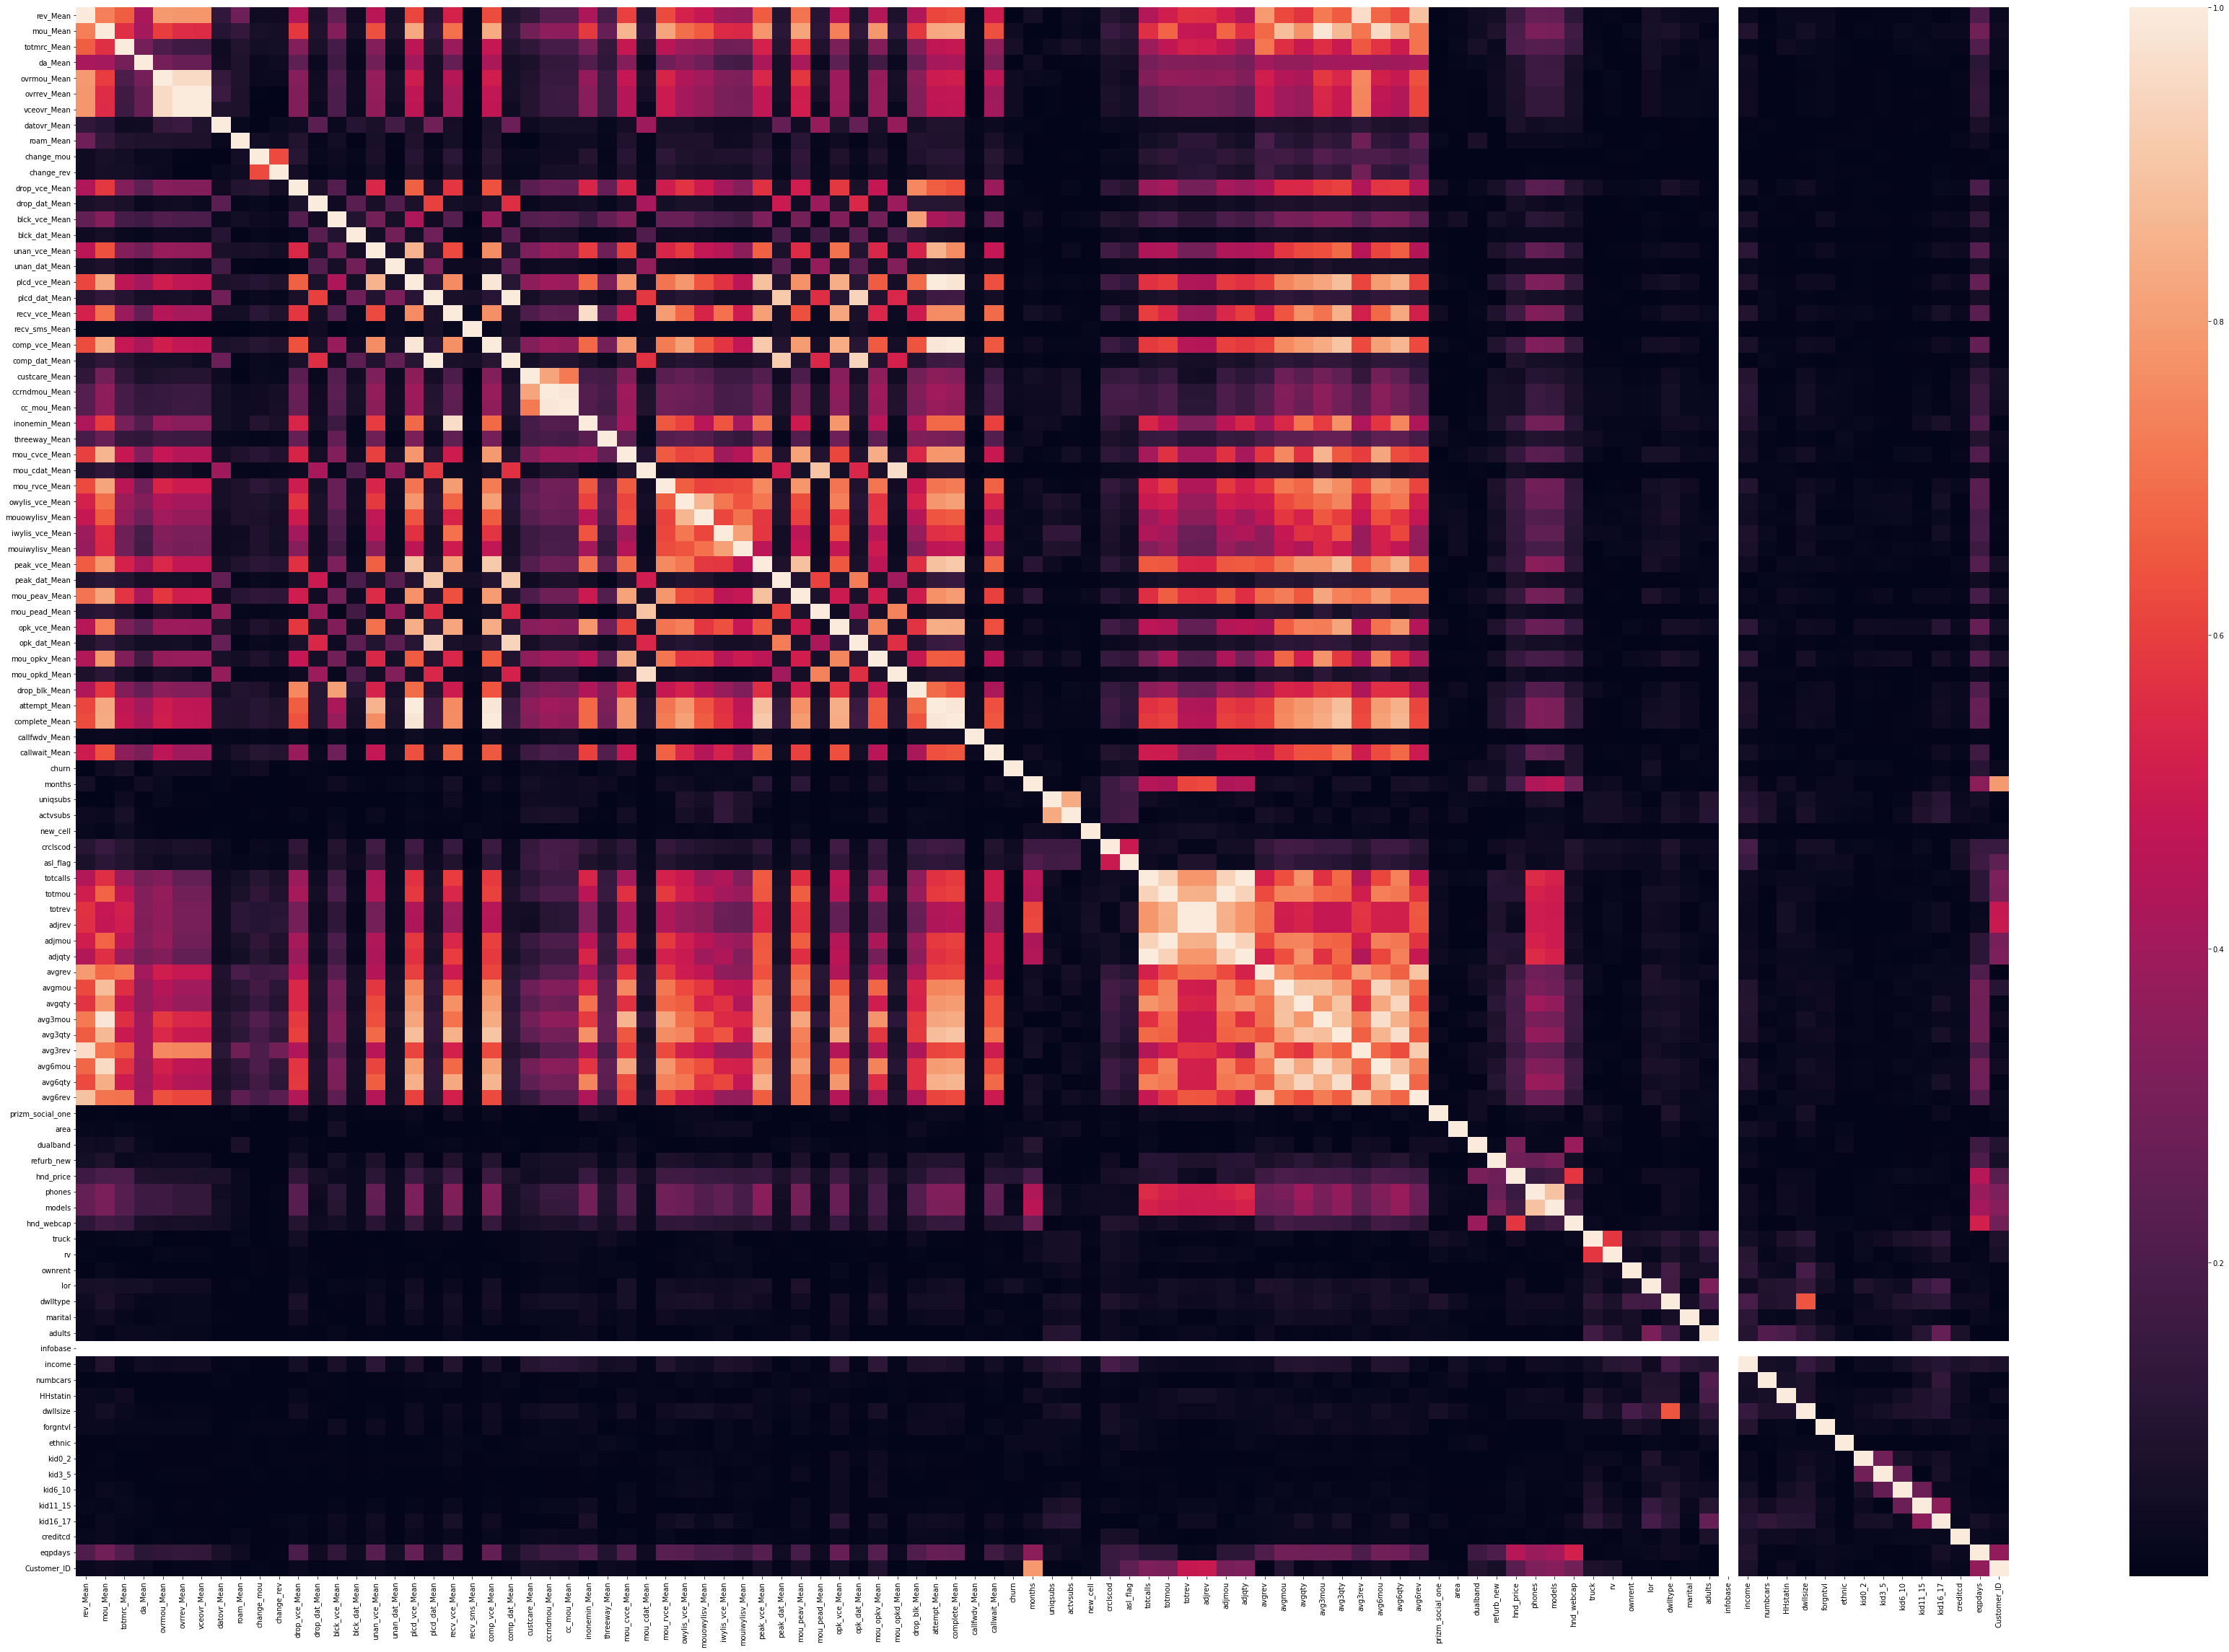

In [5]:
plt.figure(figsize = (60,40))
sns.heatmap(np.abs(df.corr()))

In [6]:
df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

## Choose RV for analysis

In [7]:
target_features = ['rev_Mean', 'totmrc_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'totrev', 'adjrev', 'avgrev', 'avg3rev', 'avg6rev', 'change_rev']


<AxesSubplot:>

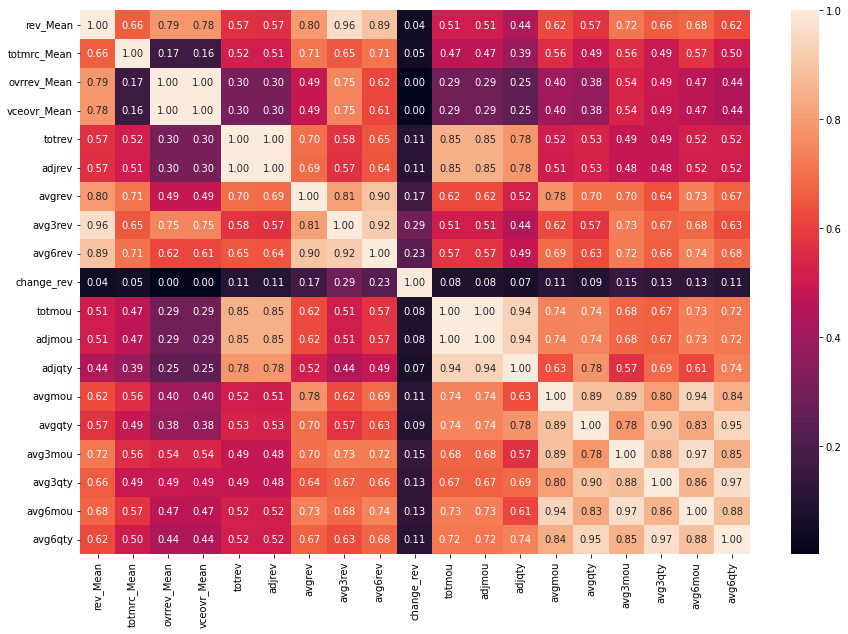

In [8]:
call_avg_features = ['totmou', 'adjmou', 'adjqty', 'avgmou','avgqty', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_avg_features].corr()), annot=True, fmt='.2f')

<AxesSubplot:>

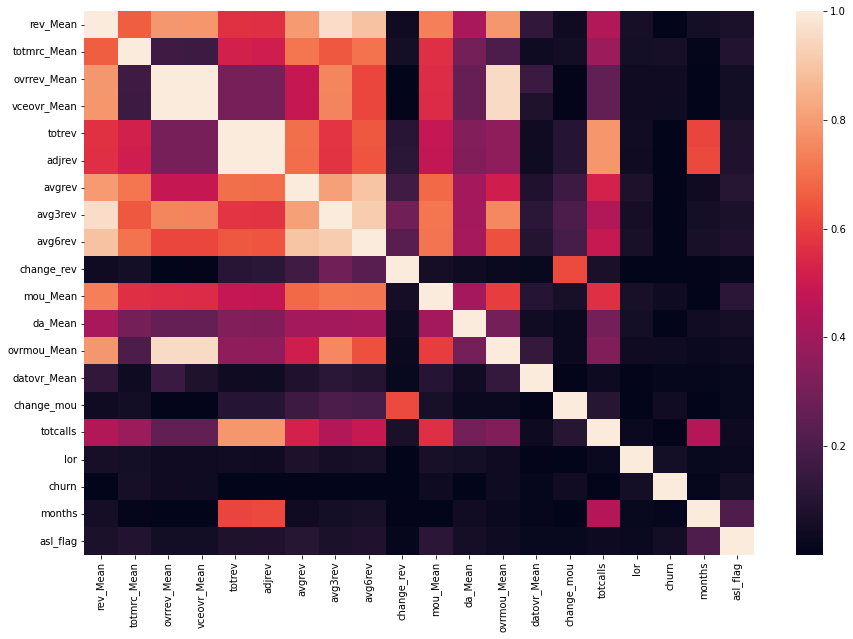

In [9]:
call_ovr_features = ['mou_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                     'change_mou', 'totcalls', 'lor', 'churn', 'months', 'asl_flag']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + call_ovr_features].corr()))

<AxesSubplot:>

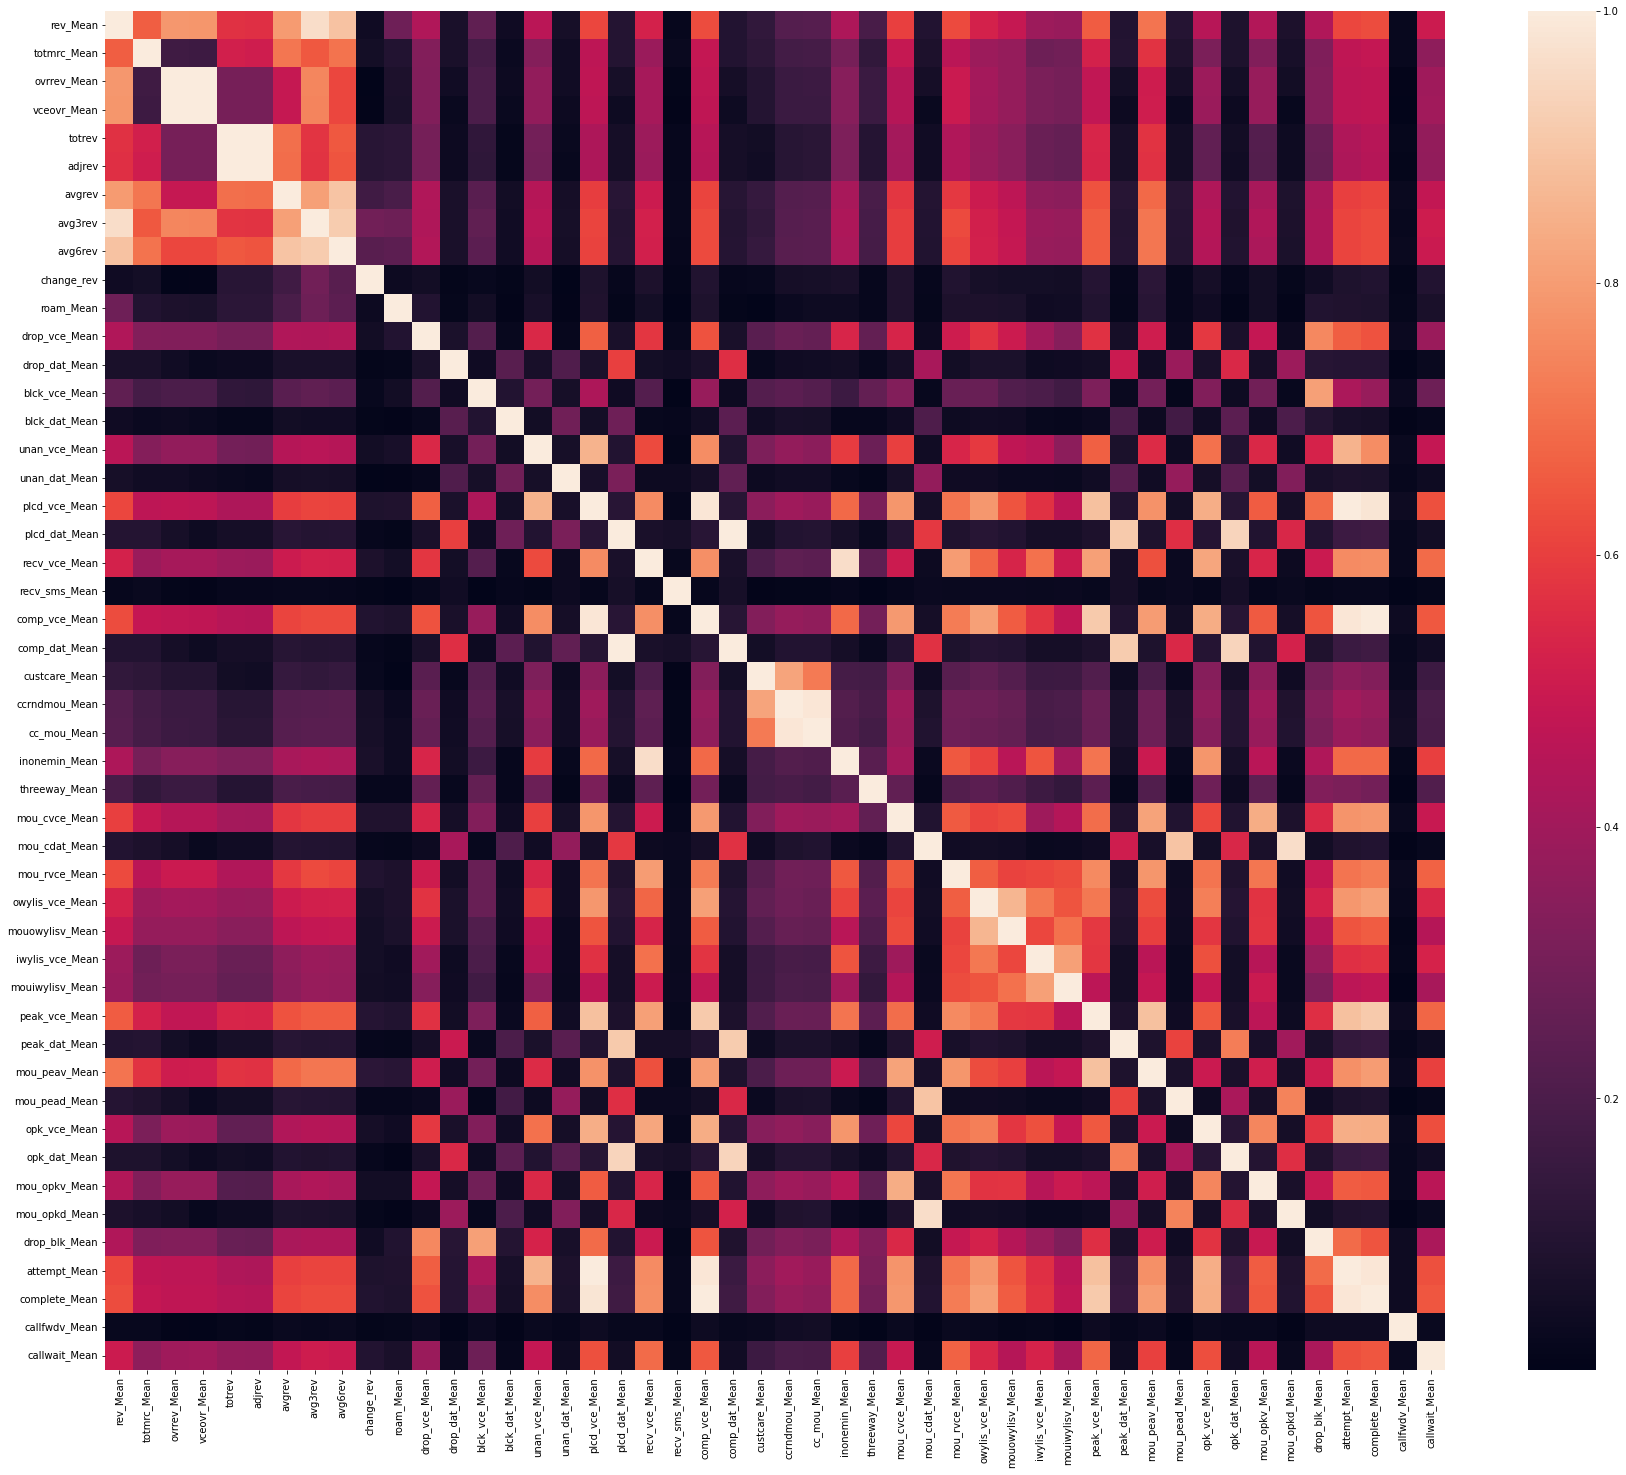

In [10]:
call_mean_features = ['roam_Mean', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean']

plt.figure(figsize = (30,25))
sns.heatmap(np.abs(df[target_features + call_mean_features].corr()))

<AxesSubplot:>

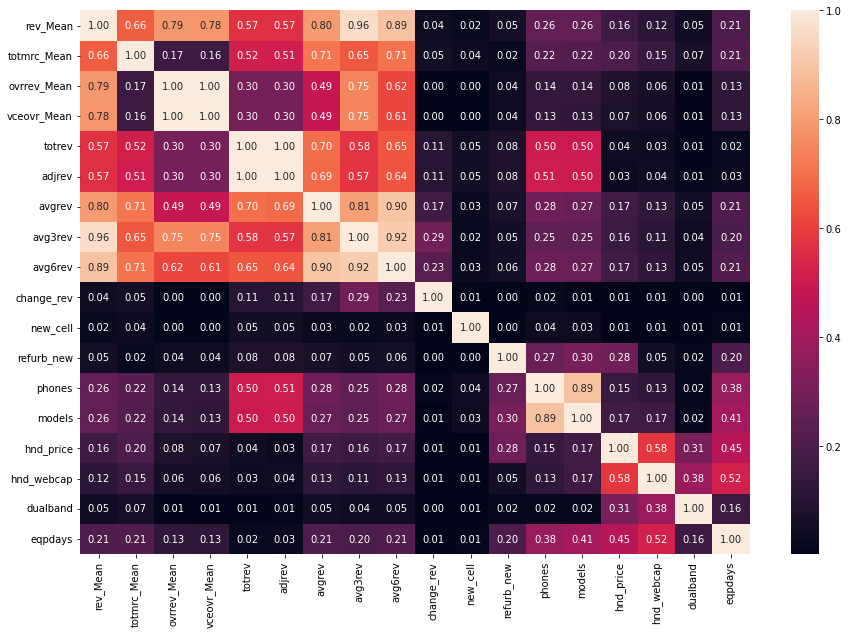

In [11]:
handset_features = ['new_cell', 'refurb_new', 'phones', 'models', 'hnd_price', 'hnd_webcap', 'dualband', 'eqpdays']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + handset_features].corr()), annot=True, fmt='.2f')

<AxesSubplot:>

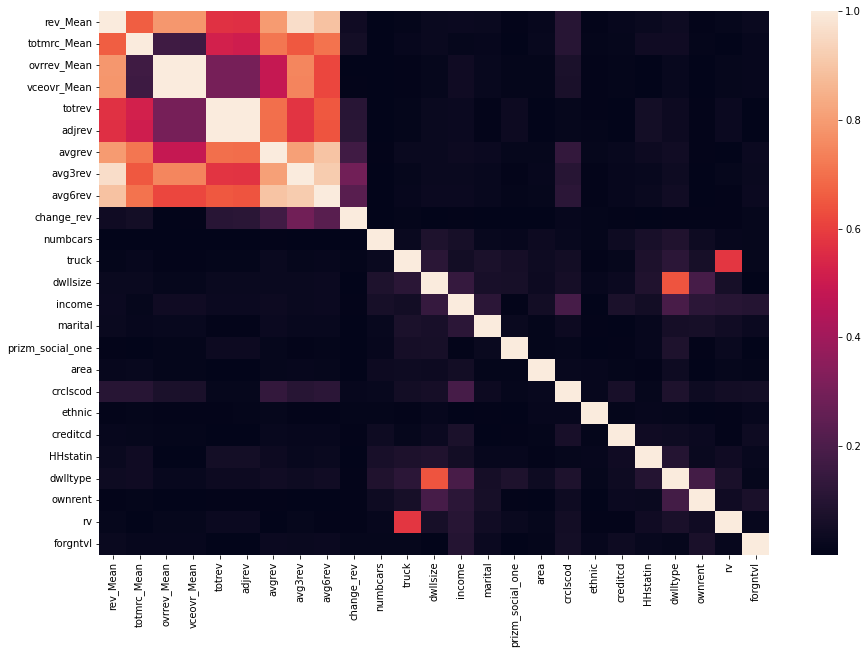

In [12]:
material_status = ['numbcars', 'truck', 'dwllsize',
                   'income', 'marital', 'prizm_social_one', 'area', 'crclscod', 'ethnic', 'creditcd', 'HHstatin',
                   'dwlltype', 'ownrent', 'rv', 'forgntvl']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + material_status].corr()))

<AxesSubplot:>

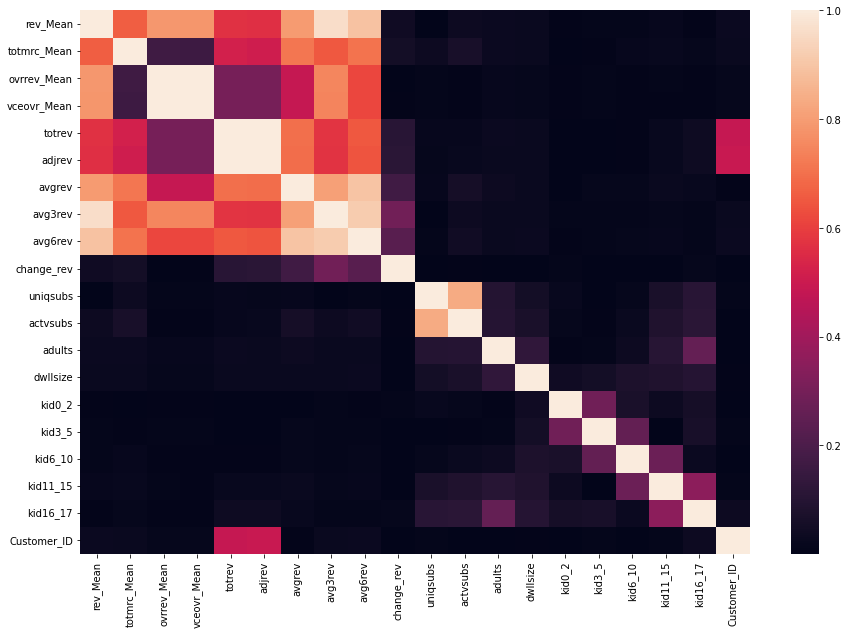

In [13]:
human_features = ['uniqsubs', 'actvsubs', 'adults', 'dwllsize', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'Customer_ID']
plt.figure(figsize = (15,10))
sns.heatmap(np.abs(df[target_features + human_features].corr()))

<AxesSubplot:>

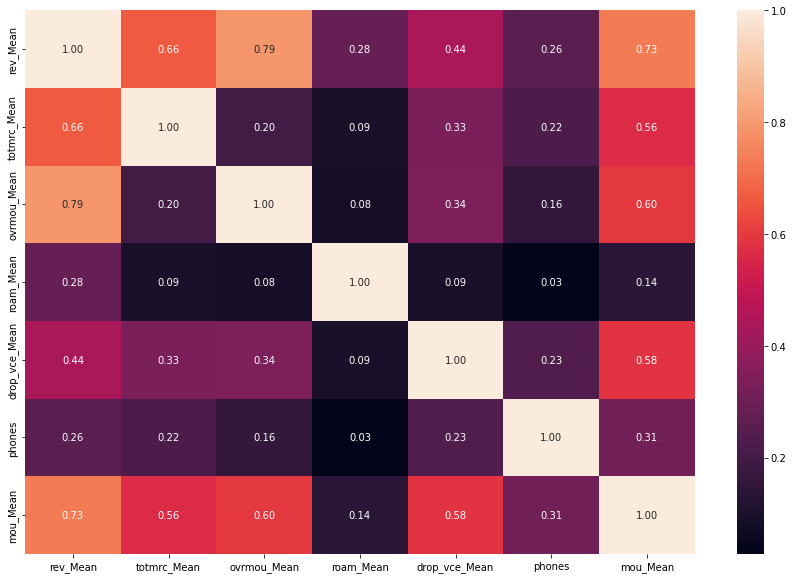

In [14]:
target_feature = 'rev_Mean'
target_features = [target_feature]

predict_features_all = ['totmrc_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean', 'mou_cvce_Mean',
                    'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'peak_vce_Mean',
                    'mou_peav_Mean', 'attempt_Mean','complete_Mean', 
                    'phones', 'models', 'datovr_Mean', 'months',
                    'mou_Mean', 'ovrmou_Mean', 'totcalls']


# predict_features = ['totmrc_Mean', 'recv_vce_Mean', 'mou_cvce_Mean', 
#                     'mou_rvce_Mean', 'owylis_vce_Mean',
#                     'mou_peav_Mean', 'attempt_Mean', 'mou_Mean', 'ovrmou_Mean', 'totcalls']
plt.figure(figsize = (15,10))
predict_features = ['totmrc_Mean', 'ovrmou_Mean', 'roam_Mean', 'drop_vce_Mean', 'phones', 'mou_Mean']
sns.heatmap(df[[target_feature] + predict_features].corr(), annot=True, fmt='.2f')

In [15]:
df_filtered = df[[target_feature] + predict_features].dropna()
df_filtered.describe()

,rev_Mean,totmrc_Mean,ovrmou_Mean,roam_Mean,drop_vce_Mean,phones,mou_Mean
count,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000,26705.000000
mean,55.376047,45.003869,36.023390,1.188133,4.991824,1.815503,450.066734
std,41.238244,23.808488,88.421331,7.017669,7.840561,1.315324,471.538127
min,0.582500,-1.422500,0.000000,0.000000,0.000000,1.000000,0.000000
25%,31.882500,30.000000,0.000000,0.000000,0.666667,1.000000,134.250000
50%,44.335000,42.490000,1.000000,0.000000,2.333333,1.000000,305.500000
75%,65.697500,58.000000,33.500000,0.292500,6.333333,2.000000,601.500000
max,672.015000,349.572500,2018.000000,476.812500,232.666667,19.000000,6103.750000


## Step 1. Non-parametric estimation of PDF in form of histogram and using kernel density function for MRV .

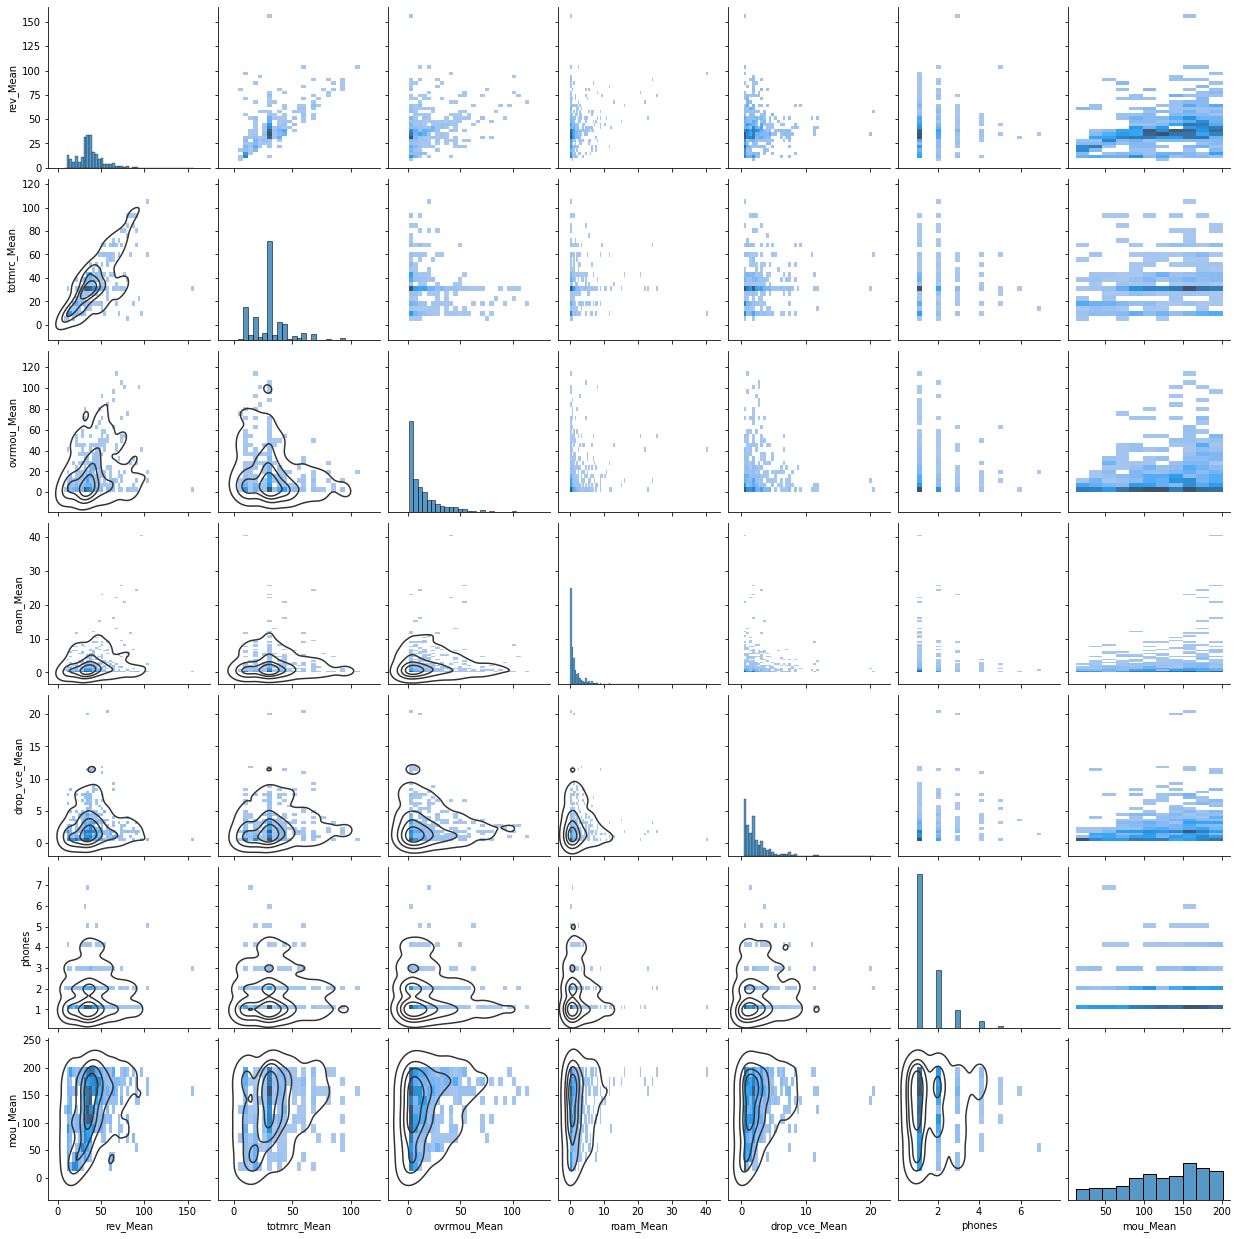

In [47]:
a = df_filtered
alpha = 10
for column in a.columns:
    a = a[(a[column] > np.percentile(df_filtered, alpha)) & (a[column] < np.percentile(df_filtered, 100 - alpha))]
g = sns.pairplot(a, kind="hist")
g.map_lower(sns.kdeplot, levels=5, color=".2")

## Step 2. Estimation of multivariate mathematical expectation and variance.

In [55]:
df_filtered.mean()

rev_Mean         55.376047
totmrc_Mean      45.003869
ovrmou_Mean      36.023390
roam_Mean         1.188133
drop_vce_Mean     4.991824
phones            1.815503
mou_Mean        450.066734
dtype: float64

In [56]:
df_filtered.var()

rev_Mean          1700.592783
totmrc_Mean        566.844100
ovrmou_Mean       7818.331802
roam_Mean           49.247672
drop_vce_Mean       61.474390
phones               1.730077
mou_Mean        222348.205259
dtype: float64

## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

phones
1 & 47.574101 & 1043.549293 \\ \hline
2 & 58.938675 & 1807.614552 \\ \hline
3 & 67.324946 & 2256.013354 \\ \hline
4 & 73.337157 & 2656.430746 \\ \hline
5 & 82.462589 & 4145.029932 \\ \hline
6 & 80.710741 & 2950.893233 \\ \hline


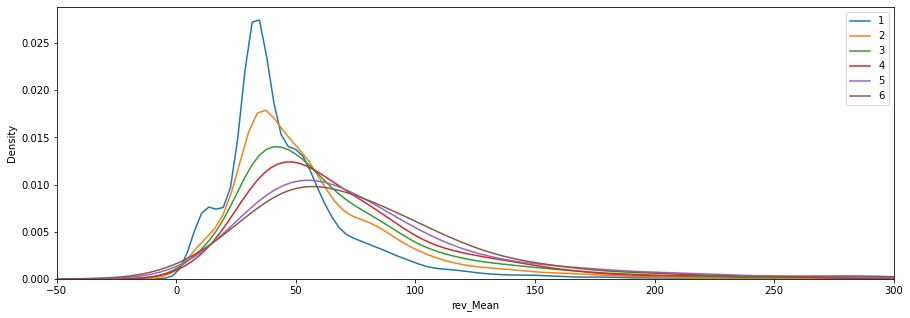

In [54]:
for target_feature in target_features:
    for cat_column in ['phones']:
        print(cat_column)
        f, ax = plt.subplots(1, figsize = (15, 5))
        for cat_column_value in [1, 2, 3, 4, 5, 6]:
            data = df_filtered[df_filtered[cat_column] == cat_column_value][target_feature]
            print("%d & %f & %f \\\\ \hline" % (cat_column_value, data.mean(), data.var()))
            sns.kdeplot(data, label=cat_column_value)
        ax = plt.gca()
        ax.set_xlim([-50, 300])
        plt.title = cat_columns
        plt.legend()
        plt.show()

## Step 4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

<AxesSubplot:>

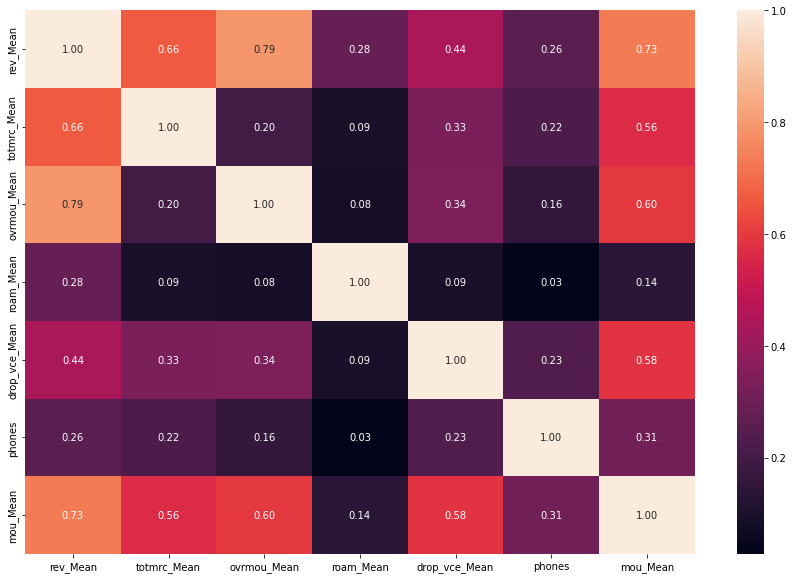

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(df_filtered.corr(), annot=True, fmt='.2f')

In [37]:
from scipy.stats import pearsonr, norm

def pearsonr_ci(x, y, alpha=0.05):
    r, _ = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, lo, hi

n = len(predict_features)
for i in range(n):
    for j in range(i + 1, n):
        cc, low, high = pearsonr_ci(df_filtered[predict_features[i]], df_filtered[predict_features[j]])
        print("%s & %s & %f & [%f, %f] \\\\ \hline" % (predict_features[i].replace("_", "\_"), predict_features[j].replace("_", "\_"), cc, low, high))

totmrc\_Mean & ovrmou\_Mean & 0.201840 & [0.190307, 0.213318] \\ \hline
totmrc\_Mean & roam\_Mean & 0.092712 & [0.080808, 0.104589] \\ \hline
totmrc\_Mean & drop\_vce\_Mean & 0.331449 & [0.320730, 0.342083] \\ \hline
totmrc\_Mean & phones & 0.224436 & [0.213016, 0.235795] \\ \hline
totmrc\_Mean & mou\_Mean & 0.563482 & [0.555241, 0.571612] \\ \hline
ovrmou\_Mean & roam\_Mean & 0.081294 & [0.069368, 0.093197] \\ \hline
ovrmou\_Mean & drop\_vce\_Mean & 0.337659 & [0.326990, 0.348243] \\ \hline
ovrmou\_Mean & phones & 0.159061 & [0.147348, 0.170729] \\ \hline
ovrmou\_Mean & mou\_Mean & 0.596890 & [0.589114, 0.604556] \\ \hline
roam\_Mean & drop\_vce\_Mean & 0.093511 & [0.081608, 0.105386] \\ \hline
roam\_Mean & phones & 0.027766 & [0.015778, 0.039747] \\ \hline
roam\_Mean & mou\_Mean & 0.135065 & [0.123270, 0.146820] \\ \hline
drop\_vce\_Mean & phones & 0.230527 & [0.219139, 0.241852] \\ \hline
drop\_vce\_Mean & mou\_Mean & 0.584887 & [0.576940, 0.592723] \\ \hline
phones & mou\_Mean & 0.

## Step 5. Task formulation for regression. Estimate multivariate correlation (target-predictors).

[Coefficient of multiple correlation](https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation)

In [121]:
df_ = full_df[predict_features + [target_feature]].dropna()
alpha = 0.4
for feature in predict_features + [target_feature]:
    df_ = df_[(df_[target_feature] > np.percentile(df[target_feature], alpha)) & (df_[target_feature] < np.percentile(df[target_feature], 100 - alpha))]
X, y = df_[predict_features], df_[target_feature]
X.shape

(98413, 6)

In [122]:
cxx = X.corr().to_numpy()
cxy = np.array([pearsonr(X[feature], y)[0] for feature in predict_features])
np.dot(np.dot(cxy.T, np.linalg.inv(cxx)), cxy)

0.9083395000001477

In [123]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
X = MinMaxScaler().fit_transform(X)
# X = PolynomialFeatures(2).fit_transform(X)

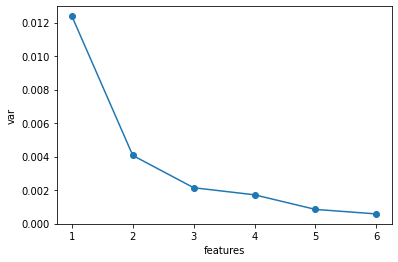

In [124]:
from sklearn.decomposition import PCA


pca = PCA().fit(X)
var = np.std(pca.transform(X), axis=0) ** 2
fig, ax = plt.subplots()
ax.plot(np.arange(len(var)) + 1, var, "o-")
ax.set_xlabel('features')
ax.set_ylabel('var')
plt.show()


## Step 6. Regression model and analysis of multicollinearity and regularization 

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [127]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2  ",r2_score(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))

R2   0.9151564942435575
RMSE 10.801810878927911


In [140]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(pd.DataFrame(X, columns=predict_features)[['totmrc_Mean', 'ovrmou_Mean', 'roam_Mean', 'drop_vce_Mean', 'phones']], y, test_size=0.33, random_state=42)

reg_ = LinearRegression().fit(X_train_, y_train_)
y_pred_ = reg_.predict(X_test_)
print("R2  ", r2_score(y_test_, y_pred_))
print("RMSE", np.sqrt(mean_squared_error(y_test_, y_pred_)))

R2   0.9150692163314312
RMSE 10.807365323928831


In [136]:
from sklearn.linear_model import Lasso

reg_ = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred_ = reg_.predict(X_test)
print("R2  ", r2_score(y_test, y_pred_))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred_)))

R2   0.8998418216914373
RMSE 11.736280346877981


          rev_Mean
count 32477.000000
mean     -0.110189
std      10.801415
min    -183.535768
25%      -5.834624
50%      -0.768652
75%       3.127883
max     184.277950
(-0.11018892281609001, 10.80124884749046)


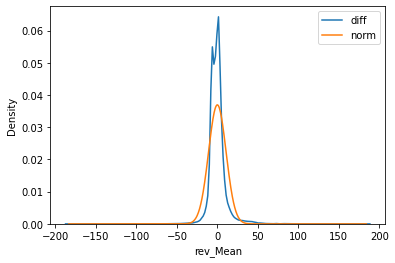

In [31]:
ax = plt.gca()
y_diff = y_test - y_pred
print(pd.DataFrame(y_diff).describe())
sns.kdeplot(y_diff, label='diff')
p = norm.fit(y_diff)
print(p)
tiks = np.arange(y_diff.min(), y_diff.max(), (y_diff.max() - y_diff.min()) / 1000)
plt.plot(tiks, norm(*p).pdf(tiks), label='norm')
plt.legend()
plt.show()

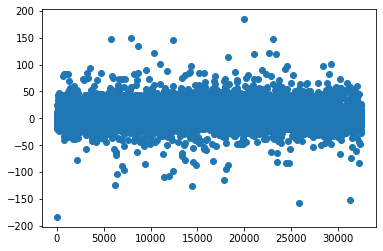

In [32]:
plt.scatter(np.arange(len(y_test)), y_diff)

In [158]:
from scipy.stats import shapiro
print(shapiro(np.random.choice(y_diff, 1000, replace=False)))

ShapiroResult(statistic=0.8032938838005066, pvalue=3.739403650309165e-33)
